In [2]:
! pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.4 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.7 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 15.3 MB/s eta 0:00:0000:0100:01


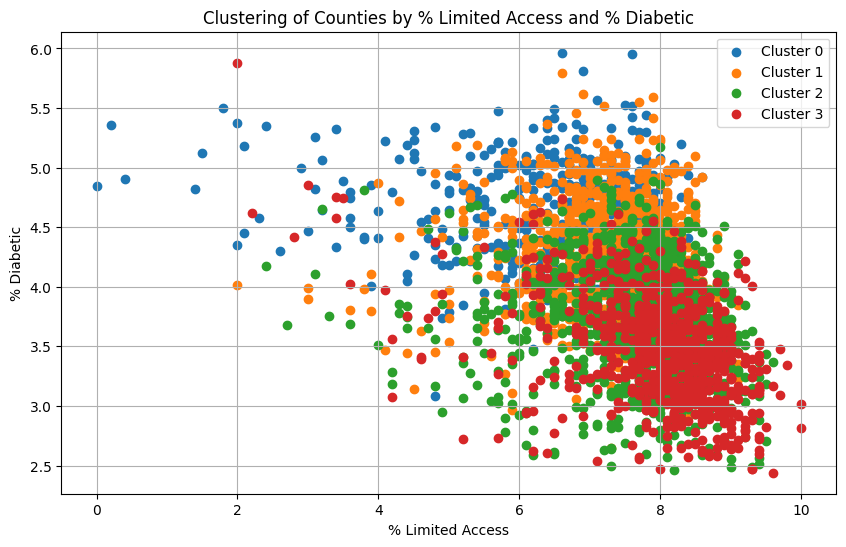

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3: Load the CSV data
file_path = '2019_Limited_Access_to_Healthy_Foods.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 4: Prepare the data for clustering
# Selecting the relevant columns for clustering


X = data[['Food Environment Index', '% Diabetic']]

# Remove rows with any NaN values in the clustering columns
X = X.dropna()

# Perform K-Means Clustering again
kmeans = KMeans(n_clusters=3, random_state=42)
data = data.loc[X.index]  # Keep only the rows without NaNs in the original DataFrame
data['Cluster'] = kmeans.fit_predict(X)


# Step 5: Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(X)

# Step 6: Visualize the Clusters
plt.figure(figsize=(10, 6))

# Plotting each cluster
for cluster in set(data['Cluster']):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Food Environment Index'], cluster_data['Mentally Unhealthy Days'], label=f'Cluster {cluster}')

plt.title('Clustering of Counties by % Limited Access and % Diabetic')
plt.xlabel('% Limited Access')
plt.ylabel('% Diabetic')
plt.legend()
plt.grid(True)
plt.show()


Correlation between % Limited Access to Healthy Foods and % Adults with Diabetes: -0.36


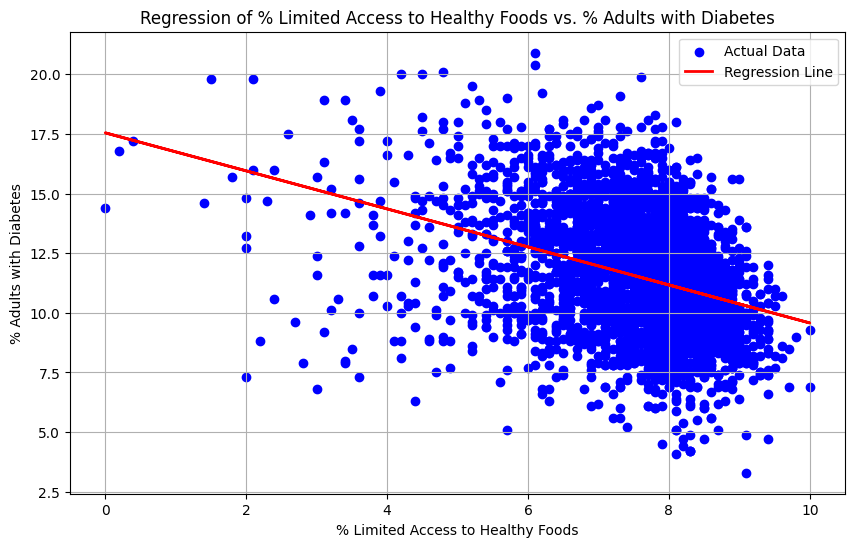

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV data
file_path = '2019_Limited_Access_to_Healthy_Foods.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 2: Prepare the data for regression
# Selecting the relevant columns for regression
X = data[['Food Environment Index']]
y = data['% Diabetic']

# Remove rows with any NaN values in the relevant columns
X = X.dropna()
y = y.loc[X.index]

# Step 3: Perform Linear Regression
regressor = LinearRegression()
regressor.fit(X, y)

# Get the predictions
y_pred = regressor.predict(X)

# Step 4: Calculate the Correlation
correlation = np.corrcoef(X['Food Environment Index'], y)[0, 1]
print(f'Correlation between % Limited Access to Healthy Foods and % Adults with Diabetes: {correlation:.2f}')

# Step 5: Visualize the Regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Regression of % Limited Access to Healthy Foods vs. % Adults with Diabetes')
plt.xlabel('% Limited Access to Healthy Foods')
plt.ylabel('% Adults with Diabetes')
plt.legend()
plt.grid(True)
plt.show()
